<a href="https://colab.research.google.com/github/OkotOlaa/Food-Sales-Prediction/blob/main/Copy_of_Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
filename = '/content/sales_predictions (4).csv'

In [2]:
df=pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#How many rows and columns?
df.shape

(8523, 12)

In [ ]:
#What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#Are there duplicates? If so, drop any duplicates.
df_new = df.drop_duplicates()
df_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Identify missing values
df_new.isna().head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Decide on how to address the missing values and do it!
#outlet size - I used the mode
df["Outlet_Size"].mode()

0    Medium
dtype: object

In [ ]:
df['Outlet_Size'].fillna('Medium', inplace=True)


In [ ]:
#item_weight
#Item weight is abit sensitive to impute, so i will add a new category to show missing
df['Item_Weight'].fillna('Missing', inplace=True)



In [ ]:
#Confirm that there are no missing values after addressing them
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#Find and fix any inconsistent categories of data
#Item_Fat_Content
df_new['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df_new['Item_Fat_Content'] = df_new['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_new['Item_Fat_Content'] = df_new['Item_Fat_Content'].replace('LF', 'Low Fat')
df_new['Item_Fat_Content'] = df_new['Item_Fat_Content'].replace('reg', 'Regular')
df_new['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#For any numerical columns, obtain the summary statistics of each
summary_stats = df.describe()
summary_stats

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
min_max_mean = summary_stats.loc[['min', 'max', 'mean']]
min_max_mean

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,0.000000,31.290000,1985.000000,33.290000
max,0.328391,266.888400,2009.000000,13086.964800
mean,0.066132,140.992782,1997.831867,2181.288914


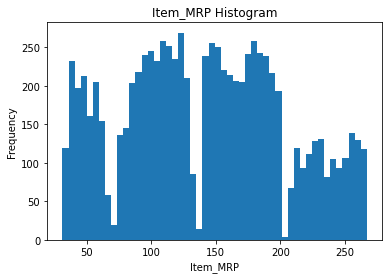

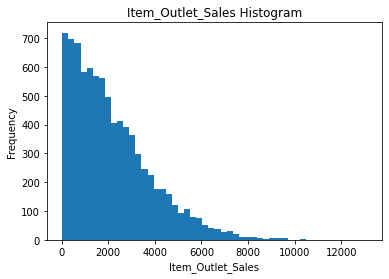

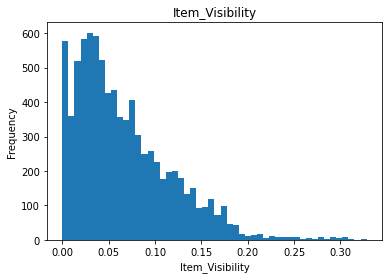

In [ ]:
#Histogram to view the distributions of various features in your dataset.

import matplotlib.pyplot as plt

# Histogram for 'Item_MRP' column
df['Item_MRP'].plot(kind='hist', bins=50)
plt.title('Item_MRP Histogram')
plt.xlabel('Item_MRP')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'Item_Outlet_Sales' column
df['Item_Outlet_Sales'].plot(kind='hist', bins=50)
plt.title('Item_Outlet_Sales Histogram')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'Item_Visibility'column
df['Item_Visibility'].plot(kind='hist', bins=50)
plt.title('Item_Visibility')
plt.xlabel('Item_Visibility')
plt.ylabel('Frequency')
plt.show()


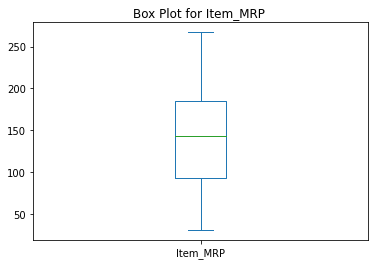

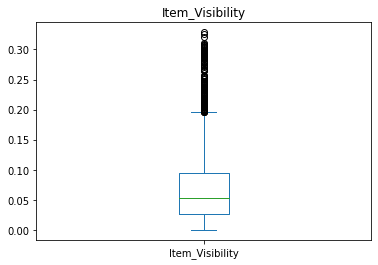

In [ ]:
#Boxplot to view statistical summaries of various features in your dataset.

# Box plots for 'Item_MRP' and 'Item_Outlet_Sales' columns
df[['Item_MRP']].plot(kind='box')
plt.title('Box Plot for Item_MRP ')
plt.show()

# Box plots for Outlet_Establishment_Year
df[['Item_Visibility']].plot(kind='box')
plt.title('Item_Visibility')
plt.show()

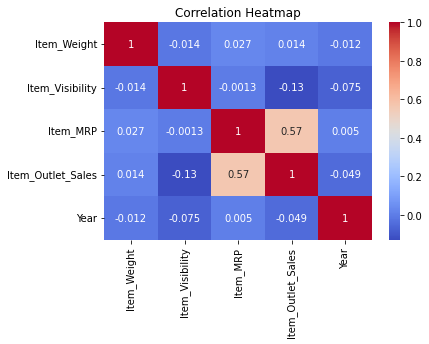

In [ ]:
#Heatmap of the correlation between features.
import seaborn as sns

# Numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Heatmap 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


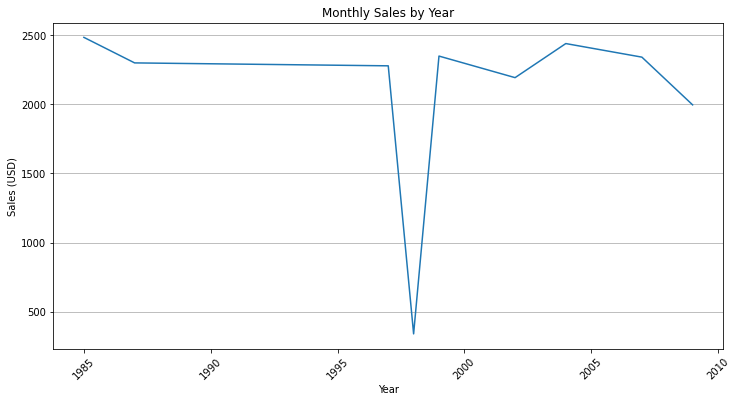

In [ ]:
#Create a minimum of two data visualizations that help others understand trends in the data.


# Dataset from the file
filename = '/content/sales_predictions (2).csv'
df = pd.read_csv(filename)

# 'Outlet_Establishment_Year' to datetime 
df['Outlet_Establishment_Year'] = pd.to_datetime(df['Outlet_Establishment_Year'], format='%Y')
df['Year'] = df['Outlet_Establishment_Year'].dt.year

# Line Plot of Monthly Sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Item_Outlet_Sales', ci=None)
plt.title('Monthly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales (USD)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y')
plt.show()


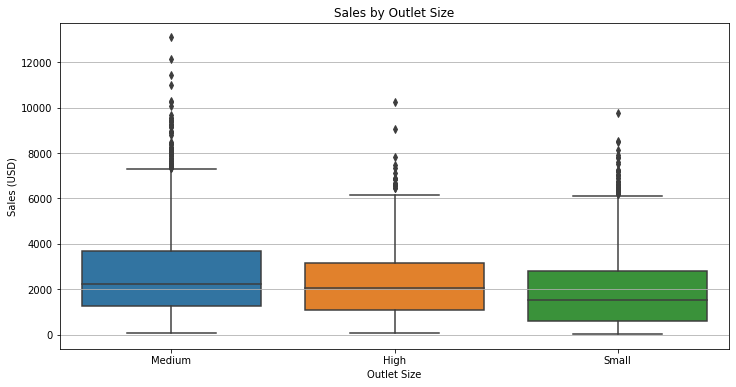

In [ ]:
# Box Plot of Sales by Outlet Size
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Sales (USD)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y')
plt.show()


In [3]:
# Project 1 - Part 5 (Core)
#Identify the features (X) and target (y): 
#Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  

#Remove unnecessary columns
relevant_df = df[['Item_Visibility','Item_Type','Item_MRP', 'Outlet_Size','Item_Outlet_Sales', 'Outlet_Location_Type','Outlet_Type']].copy()
relevant_df.head()

,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Location_Type,Outlet_Type
0,0.016047,Dairy,249.8092,Medium,3735.1380,Tier 1,Supermarket Type1
1,0.019278,Soft Drinks,48.2692,Medium,443.4228,Tier 3,Supermarket Type2
2,0.016760,Meat,141.6180,Medium,2097.2700,Tier 1,Supermarket Type1
3,0.000000,Fruits and Vegetables,182.0950,NaN,732.3800,Tier 3,Grocery Store
4,0.000000,Household,53.8614,High,994.7052,Tier 3,Supermarket Type1


In [4]:
#Define features (X) and target (y).
y = relevant_df['Item_Outlet_Sales']
X = relevant_df.drop(columns = 'Item_Outlet_Sales')
X.head()

,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2
2,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1
3,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store
4,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1


In [5]:
#Perform a train test split 
relevant_df.info()
#checking entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Visibility       8523 non-null   float64
 1   Item_Type             8523 non-null   object 
 2   Item_MRP              8523 non-null   float64
 3   Outlet_Size           6113 non-null   object 
 4   Item_Outlet_Sales     8523 non-null   float64
 5   Outlet_Location_Type  8523 non-null   object 
 6   Outlet_Type           8523 non-null   object 
dtypes: float64(3), object(4)
memory usage: 466.2+ KB


In [6]:
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
#checking
len(X_train)

6392

In [8]:
#Create a preprocessing object to prepare the dataset for Machine Learning
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


# Identify categorical and numerical columns
cat_cols = ['Item_Type','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
num_cols = [ 'Item_Visibility', 'Item_MRP']

# Preprocessing object to transform numerical columns
num_transformer = StandardScaler()

# Preprocessing object to transform categorical columns
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessing object to impute missing values in numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Preprocessing object to impute missing values in categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')

# Preprocessing object to combine the numerical and categorical transformers and imputers
preprocessor = ColumnTransformer(transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ], remainder='passthrough')
    
# Fit the preprocessing object on the training data and transform both training and test sets
X_train = preprocessor.fit_transform(X_train)

# Impute missing values in numerical columns of the training data using mean strategy
X_train[:, :4] = num_imputer.fit_transform(X_train[:, :4])

# Impute missing values in categorical columns of the training data using most frequent strategy
X_train[:, 4:] = cat_imputer.fit_transform(X_train[:, 4:])



